# Predicting the handwritten numbers

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

# Data Preprocessing

In [24]:
train=pd.read_csv('train.csv')
train.shape

(42000, 785)

In [26]:
test=pd.read_csv('test.csv')

In [28]:
Y_train=train.label

In [30]:
X_train=train.drop(['label'],axis=1)

In [32]:
X_train.shape,test.shape

((42000, 784), (28000, 784))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

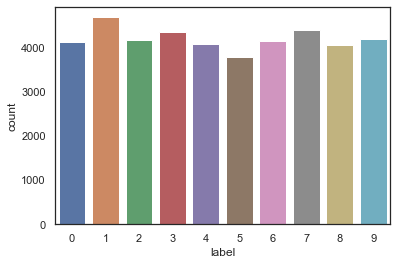

In [33]:
sns.countplot(Y_train)


## Checking for the missing value or corrupted image

In [34]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [35]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

There is no missing values in image hence no corrupted image in test and train data

# Standardization


In [36]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)

test=scalar.fit_transform(test)

# Reshaping the values to see actual data

In [37]:
X_train2=X_train.reshape(-1,28,28,1);
test2=test.reshape(-1,28,28,1);
X_train2.shape,test2.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

(<matplotlib.image.AxesImage at 0x24e8afd0280>, 0)

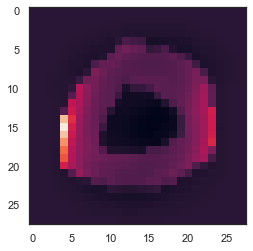

In [38]:
plt.imshow(X_train2[110][:,:,:]),Y_train[110]

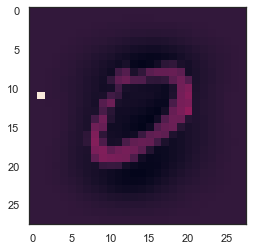

In [39]:
plt.imshow(test2[3][:,:,:])

# Applying PCA to the data

Original dimensions

In [40]:
X_train.shape,Y_train.shape,test.shape

((42000, 784), (42000,), (28000, 784))

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=2)

In [43]:
pca.fit(X_train[:1500,:])

PCA(n_components=2)

In [44]:
pca_data=pca.transform(X_train)

In [45]:
pca_data.shape,type(pca_data)

((42000, 2), numpy.ndarray)

In [46]:
pca_data=np.vstack((pca_data.T,Y_train.T)).T

In [47]:
pca_data

array([[-5.00623466, -2.69471918,  1.        ],
       [19.0336319 ,  0.05244418,  0.        ],
       [-7.62488491, -1.93703683,  1.        ],
       ...,
       [-0.27587651,  7.94655507,  7.        ],
       [ 1.75685189, -0.16348955,  6.        ],
       [-5.19455837,  0.63922014,  9.        ]])

In [48]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


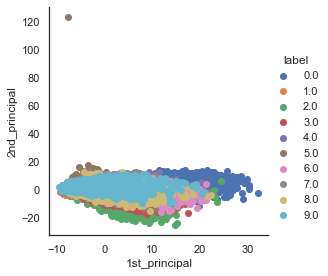

In [49]:
sns.FacetGrid(pca_df,hue='label',size=4).map(plt.scatter,"1st_principal", "2nd_principal").add_legend()

# Applying t-SNE 

In [50]:
X_train.shape,Y_train.shape,test.shape

((42000, 784), (42000,), (28000, 784))

In [51]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0)

In [52]:
tsne_data1000=tsne.fit_transform(X_train[0:1000,:])

In [53]:
tsne_data1000=np.vstack((tsne_data1000.T,Y_train[0:1000].T)).T

In [54]:
tsne_data1000.shape

(1000, 3)

In [55]:
tsne_df1000 = pd.DataFrame(data=tsne_data1000, columns=("1st_column", "2nd_column", "label"))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


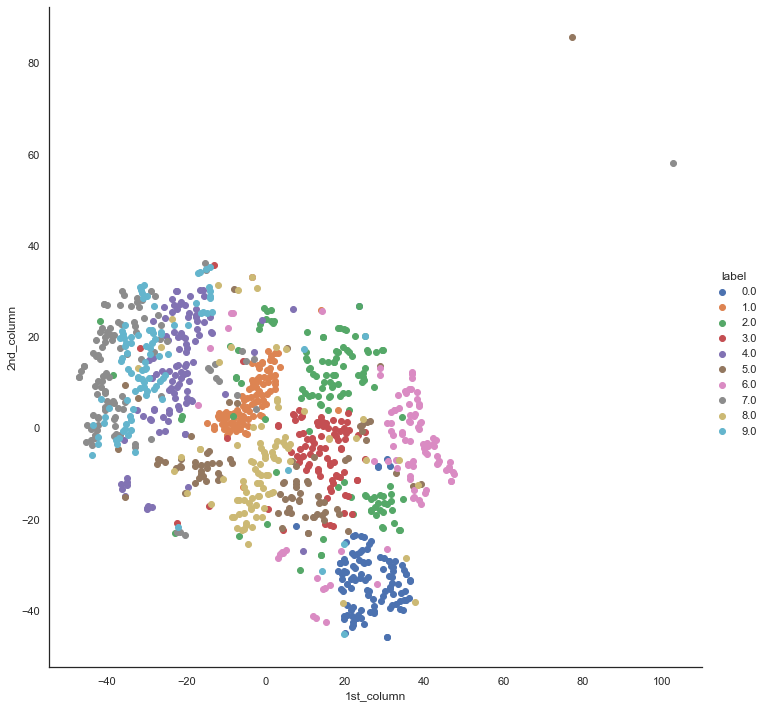

In [56]:
sns.FacetGrid(tsne_df1000,hue='label',size=10).map(plt.scatter,"1st_column", "2nd_column").add_legend()

# t-SNE with diffrent data size,perplexity,iterations

In [57]:
# import ipywidgets as widgets
# from ipywidgets import interact
# from ipywidgets import interact_manual

In [58]:
# @interact_manual
# def check(preplexity = list(np.arange(2,100)),
#           iterations = list(np.arange(1000,5000,1000)),
#           data_size = list(np.arange(1000,42000,1000))):
#     tsne=TSNE(n_components=2,random_state=0,perplexity=preplexity,n_iter=iterations)
#     tsne_data=tsne.fit_transform(X_train[0:data_size,:])
#     tsne_data=np.vstack((tsne_data.T,Y_train[0:data_size].T)).T
#     tsne_df= pd.DataFrame(data=tsne_data, columns=("1st_column", "2nd_column", "label"))
#     sns.FacetGrid(tsne_df,hue='label',size=7).map(plt.scatter,"1st_column", "2nd_column").add_legend()
#     plt.show()

interactive(children=(Dropdown(description='preplexity', options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …